# **Facial Expressions Saturdays Ai**

Proyecto de la primera edición de Donostia de Saturdays Ai 2020.


1. Importación de librerías

In [1]:
import boto3, re
import sagemaker

sagemaker_session = sagemaker.Session()

region = sagemaker_session.boto_session.region_name

bucket = sagemaker.Session().default_bucket()   # Default S3 URI. Replace it with your S3 URI if you want.

In [2]:
import cv2, os
import numpy as np 
import pandas as pd
from sagemaker import get_execution_role
from sagemaker.tensorflow import TensorFlow
from tqdm import tqdm
!pip install tensorflow -t ./
from tensorflow.python.keras.utils import np_utils

     |████████████████████████████████| 394.7 MB 3.6 kB/s  eta 0:00:01     |███████████████████████████▋    | 340.8 MB 81.8 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 63.1 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 3.8 MB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 64.2 MB/s eta 0:00:01
  Using cached pyasn1-0.4.8-py2.py3-none-a

2. Importación data training

In [3]:
labels = []

for i in os.listdir('data/train/0'):
    labels.append(0)
for i in os.listdir('data/train/1'):
    labels.append(1)
for i in os.listdir('data/train/2'):
    labels.append(2)
for i in os.listdir('data/train/3'):
    labels.append(3)
for i in os.listdir('data/train/4'):
    labels.append(4)
for i in os.listdir('data/train/5'):
    labels.append(5)
for i in os.listdir('data/train/6'):
    labels.append(6)

In [4]:
#feature extraction on training data

loc1 = 'data/train/0'
loc2 = 'data/train/1'
loc3 = 'data/train/2'
loc4 = 'data/train/3'
loc5 = 'data/train/4'
loc6 = 'data/train/5'
loc7 = 'data/train/6'

features = []

for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:02<00:00, 2074.60it/s]


In [5]:
labels_test = []
for i in os.listdir('data/test/0'):
    labels_test.append(0)
for i in os.listdir('data/test/1'):
    labels_test.append(1)
for i in os.listdir('data/test/2'):
    labels_test.append(2)
for i in os.listdir('data/test/3'):
    labels_test.append(3)
for i in os.listdir('data/test/4'):
    labels_test.append(4)
for i in os.listdir('data/test/5'):
    labels_test.append(5)
for i in os.listdir('data/test/6'):
    labels_test.append(6)

In [6]:
#feature extraction on testing data

loc1 = 'data/test/0'
loc2 = 'data/test/1'
loc3 = 'data/test/2'
loc4 = 'data/test/3'
loc5 = 'data/test/4'
loc6 = 'data/test/5'
loc7 = 'data/test/6'

test_features = []

for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:00<00:00, 2095.32it/s]


In [7]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [8]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [9]:
train_data.head()

,emotion,pixel_values
0,0,"[[13, 10, 31, 29, 6, 1, 1, 8, 7, 6, 4, 26, 66,..."
1,0,"[[94, 113, 106, 85, 76, 74, 133, 183, 184, 184..."
2,0,"[[42, 41, 34, 43, 68, 106, 134, 137, 136, 132,..."
3,0,"[[23, 26, 20, 11, 7, 17, 33, 11, 2, 63, 91, 73..."
4,0,"[[13, 15, 15, 14, 15, 15, 10, 9, 11, 11, 11, 1..."


In [10]:
test_data.head()

,emotion,pixel_values
0,0,"[[17, 19, 19, 19, 17, 16, 16, 16, 19, 19, 19, ..."
1,0,"[[150, 152, 153, 154, 154, 155, 156, 158, 157,..."
2,0,"[[116, 125, 131, 124, 145, 151, 129, 133, 154,..."
3,0,"[[50, 51, 51, 52, 56, 57, 58, 56, 57, 58, 57, ..."
4,0,"[[196, 196, 194, 195, 200, 205, 207, 208, 205,..."


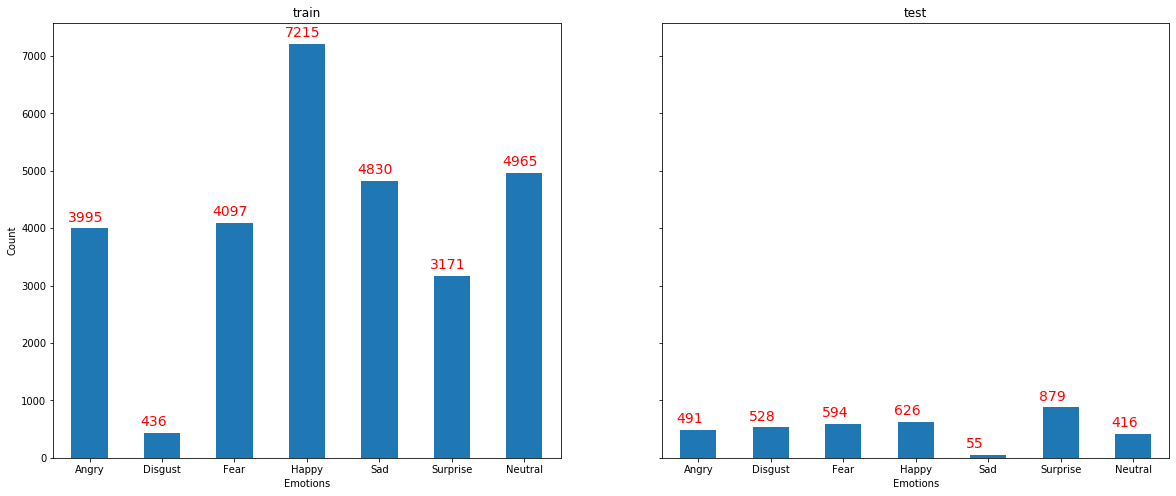

In [11]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='red',
                    rotation=0)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)
setup_axe(axes[0],train_data,'train')
setup_axe(axes[1],test_data,'test')
plt.show()

In [12]:
features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

In [13]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)


In [14]:
%%time

import os
import re
import copy
import time
import io
import struct
from time import gmtime, strftime

import boto3
import sagemaker

role = sagemaker.get_execution_role()

region = boto3.Session().region_name

bucket = sagemaker.Session().default_bucket()   # Default S3 URI. Replace it with your S3 URI if you want.
prefix = 'sagemaker/data' # Used as part of the path in the bucket where you store data

def convert_data():
    
    data_partitions = [('train', features), ('test', test_features)]
    for data_partition_name, data_partition in data_partitions:
        print('{}: {} {}'.format(data_partition_name, data_partition[0].shape, data_partition[1].shape))
        lab = [t.tolist() for t in data_partition[1]]
        feat = [t.tolist() for t in data_partition[0]]

        examples = np.insert(feat, 0, lab, axis=1)  
        print(examples.reshape((2,-1)))
        np.savetxt('data.csv', examples.reshape((2,-1)), delimiter=',')
        
        key = "{}/{}/examples".format(prefix,data_partition_name)
        url = 's3://{}/{}'.format(bucket, key)
        boto3.Session().resource('s3').Bucket(bucket).Object(key).upload_file('data.csv')
        print('Done writing to {}'.format(url))
        
convert_data()

train: (48, 48, 1) (48, 48, 1)
[[0.36862745 0.37647059 0.38823529 ... 0.04705882 0.07058824 0.07058824]
 [0.77647059 0.75294118 0.72156863 ... 0.49803922 0.50196078 0.50588235]]
Done writing to s3://sagemaker-us-east-2-972330131871/sagemaker/data/train/examples
test: (48, 48, 1) (48, 48, 1)
[[0.58823529 0.59215686 0.59607843 ... 0.62745098 0.62352941 0.60784314]
 [0.15294118 0.05882353 0.05098039 ... 0.47058824 0.48235294 0.49411765]]
Done writing to s3://sagemaker-us-east-2-972330131871/sagemaker/data/test/examples
CPU times: user 575 ms, sys: 44 ms, total: 619 ms
Wall time: 998 ms


In [15]:
import sagemaker

from sagemaker import image_uris

container = sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")

In [16]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.metrics import categorical_accuracy
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.optimizers import *
from tensorflow.python.keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score

In [17]:
%%writefile train.py

import argparse
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.layers import Embedding, Dropout
from keras.callbacks import EarlyStopping
import pandas as pd

if __name__ == '__main__':

 
    es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    model.summary()

    model.fit(x=features, 
            y=labels,
            epochs=10, 
            steps_per_epoch = len(features)/64,
            verbose=1, 
            callbacks = [es],
            validation_data=(test_features,labels_test),  
            validation_steps = len(features)/64)

     tf.saved_model.simple_save(
     tf.keras.backend.get_session(),
     os.path.join(model_dir, '1'),
     inputs={'inputs': model.input},
     outputs={t.name: t for t in model.outputs})
    

Writing train.py


In [27]:
train_data = 's3://{}/{}/{}'.format(bucket, prefix, 'train')
s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'model_sdk')
tf_estimator = TensorFlow(entry_point = 'train.py',
                          role = role, 
                          framework_version = '1.11.0', 
                          py_version = 'py3',
                          train_instance_count=1,
                          train_instance_type = 'ml.t2.medium',
                          output_path=s3_output_location)

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [28]:
history = tf_estimator.fit({'train':train_data})


ClientError: An error occurred (ValidationException) when calling the CreateTrainingJob operation: 1 validation error detected: Value 'ml.t2.medium' at 'resourceConfig.instanceType' failed to satisfy constraint: Member must satisfy enum value set: [ml.p2.xlarge, ml.m5.4xlarge, ml.m4.16xlarge, ml.p4d.24xlarge, ml.c5n.xlarge, ml.p3.16xlarge, ml.m5.large, ml.p2.16xlarge, ml.c4.2xlarge, ml.c5.2xlarge, ml.c4.4xlarge, ml.c5.4xlarge, ml.c5n.18xlarge, ml.g4dn.xlarge, ml.g4dn.12xlarge, ml.c4.8xlarge, ml.g4dn.2xlarge, ml.c5.9xlarge, ml.g4dn.4xlarge, ml.c5.xlarge, ml.g4dn.16xlarge, ml.c4.xlarge, ml.g4dn.8xlarge, ml.c5n.2xlarge, ml.c5n.4xlarge, ml.c5.18xlarge, ml.p3dn.24xlarge, ml.p3.2xlarge, ml.m5.xlarge, ml.m4.10xlarge, ml.c5n.9xlarge, ml.m5.12xlarge, ml.m4.xlarge, ml.m5.24xlarge, ml.m4.2xlarge, ml.p2.8xlarge, ml.m5.2xlarge, ml.p3.8xlarge, ml.m4.4xlarge]

In [ ]:
from sklearn.externals import joblib 
joblib.dump(history, 'modelo_entrenado.pkl') 

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))